In [14]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict
from collections import Counter


In [15]:

def show_results(root_dir):
    summary_results = []
    total_json_count = 0
    all_model_paths = []

    # === Traverse and summarize ===
    for group_dir in sorted(root_dir.iterdir()):
        if not group_dir.is_dir():
            continue

        metrics_list = []

        for subdir in group_dir.iterdir():
            if not subdir.is_dir():
                continue

            json_file = subdir / "results.json"
            if json_file.exists():
                total_json_count += 1
                with open(json_file, "r") as f:
                    data = json.load(f)
                    data["group"] = group_dir.name
                    metrics_list.append(data)
                    all_model_paths.append(data.get("model_path", "unknown"))

        if metrics_list:
            df = pd.DataFrame(metrics_list)
            df_mean = df.drop(columns=["dataset", "freq", "model_path"]).mean(numeric_only=True)
            df_mean["group"] = group_dir.name
            summary_results.append(df_mean)

    # === Combine summaries ===
    summary_df = pd.DataFrame(summary_results)
    summary_df.sort_values("group", inplace=True)

    # === Display summary table ===
    print("\n📊 Summary of Mean Metrics per Dataset Group:")
    display(summary_df)

    # === Compute overall global mean across all groups ===
    global_means = summary_df.drop(columns=["group"]).mean(numeric_only=True)
    print("\n📌 Global Mean Across All Groups:")
    print(global_means.round(4))

    # === Determine model name to display in title ===
    model_name = Counter(all_model_paths).most_common(1)[0][0] if all_model_paths else "Unknown Model"

    # === Visualization ===
    plt.figure(figsize=(12, 6))
    for metric in ["mse", "mae", "smape", "wape", "nrmse"]:
        if metric in summary_df.columns:
            plt.plot(summary_df["group"], summary_df[metric], marker='o', label=metric)

    plt.xticks(rotation=45)
    plt.xlabel("Dataset Group")
    plt.ylabel("Metric Value")
    plt.title(f"Average Forecasting Metrics by Dataset Group\nModel: {model_name} pred len: {summary_df['pred_len'][0]} context len: {summary_df['context_len'][0]}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Total json count ===
    print(f"\n🔢 Total number of results.json files found: {total_json_count}")


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,1.275650,0.777921,0.657819,0.901977,1.501043,3584.000000,2755.319255,2.020232,96.0,128.0,crypto10_1d
1,0.106263,0.419566,0.215820,0.248533,0.374963,20736.000000,18006.963867,8.504332,96.0,128.0,crypto10_1h
2,0.264981,0.571621,0.333160,0.406429,0.625476,8704.000000,7165.317383,4.023402,96.0,128.0,crypto10_1m
3,0.430595,0.654025,0.445811,0.505474,0.727588,6720.000000,5925.901855,3.183501,96.0,128.0,forex_datasets_1d
4,0.216686,0.494924,0.287013,0.340292,0.528097,20608.000000,17631.636068,8.619947,96.0,128.0,forex_datasets_1h
5,0.440671,0.609860,0.421853,0.490706,0.741928,11904.000000,10240.671549,4.987695,96.0,128.0,forex_datasets_1m
6,2.950444,1.356815,1.303821,1.685227,2.229202,1920.000000,1488.001587,0.977219,96.0,128.0,forex_datasets_1wk
7,0.700693,0.792001,0.473009,0.631751,1.106400,7200.000000,5421.123291,2.868233,96.0,128.0,futures_datasets_1d
8,0.205973,0.481169,0.279272,0.315972,0.513485,16128.000000,14254.699219,8.261734,96.0,128.0,futures_datasets_1h
9,0.473364,0.619147,0.436363,0.517042,0.766018,9024.000000,7729.359985,3.491351,96.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.9156
smape              0.7867
mae                0.5844
wape               0.7291
nrmse              1.0696
num_elements    8374.2386
abs_sum         7074.0949
total_time         3.7486
pred_len          96.0000
context_len      128.0000
dtype: float64


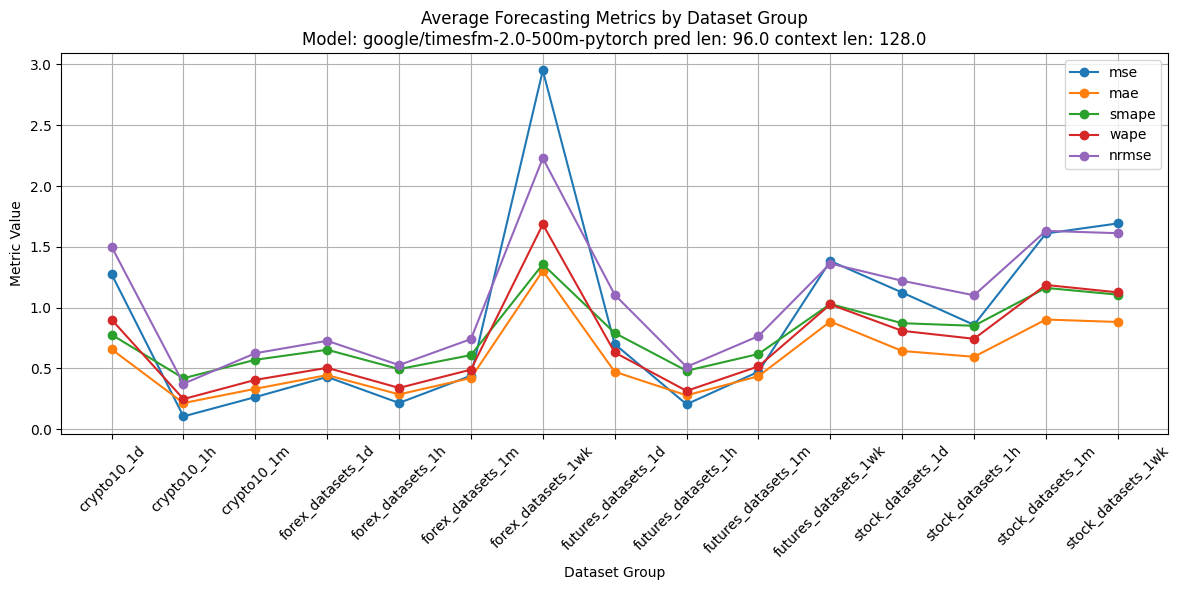


🔢 Total number of results.json files found: 908


In [12]:
#config
# Define the root result directory
root_dir = Path(r"tsfm_500m_t1")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.878540,0.699590,0.539230,0.733351,1.232452,3584.000000,2755.319255,0.326754,96.0,128.0,crypto10_1d
1,0.108872,0.433038,0.219724,0.253033,0.379804,20736.000000,18006.963867,1.467541,96.0,128.0,crypto10_1h
2,0.229687,0.532558,0.303543,0.369915,0.581464,8704.000000,7165.317383,0.619539,96.0,128.0,crypto10_1m
3,0.391134,0.592960,0.405941,0.460200,0.685518,6720.000000,5925.901855,0.553403,96.0,128.0,forex_datasets_1d
4,0.184193,0.467761,0.269061,0.319020,0.490192,20608.000000,17631.636068,1.360505,96.0,128.0,forex_datasets_1h
5,0.377881,0.598016,0.397903,0.463290,0.688937,11904.000000,10240.671549,0.896386,96.0,128.0,forex_datasets_1m
6,3.753296,1.437489,1.531118,1.951452,2.423499,1920.000000,1488.001587,0.206327,96.0,128.0,forex_datasets_1wk
7,0.718523,0.776135,0.461004,0.614596,1.112553,7200.000000,5421.123291,0.561689,96.0,128.0,futures_datasets_1d
8,0.187256,0.474867,0.261675,0.296063,0.489598,16128.000000,14254.699219,1.307437,96.0,128.0,futures_datasets_1h
9,0.466167,0.641833,0.431411,0.511711,0.760848,9024.000000,7729.359985,0.644444,96.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                1.0094
smape              0.7869
mae                0.6042
wape               0.7505
nrmse              1.0851
num_elements    8374.2386
abs_sum         7074.0949
total_time         0.6327
pred_len          96.0000
context_len      128.0000
dtype: float64


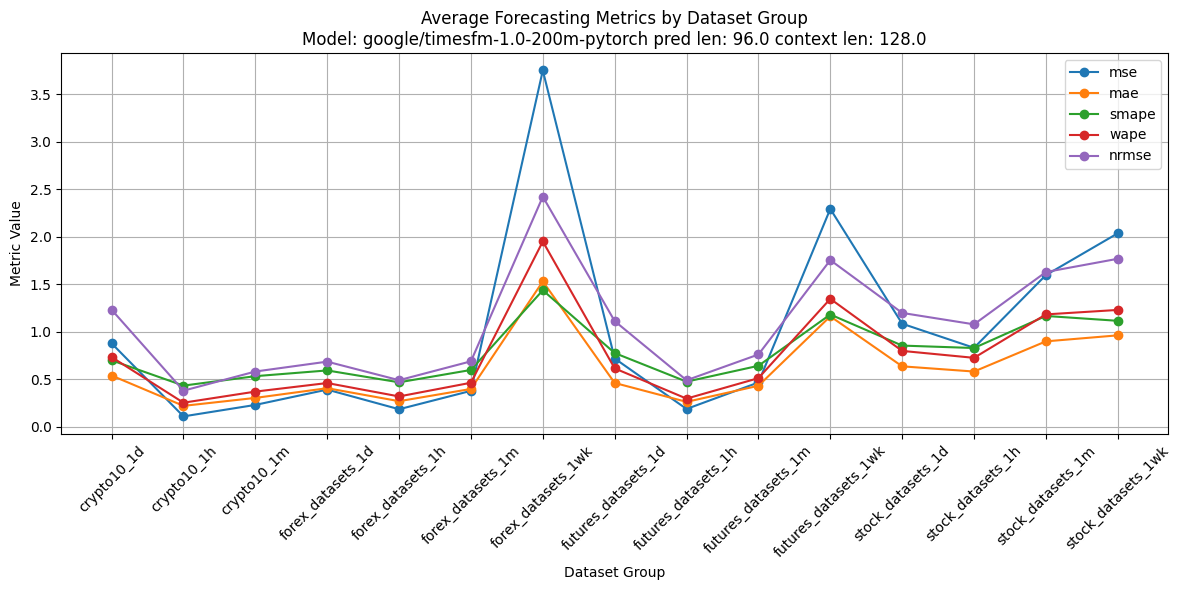


🔢 Total number of results.json files found: 908


In [13]:
#config
# Define the root result directory
root_dir = Path(r"tsfm_200m_t1")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.081426,0.238725,0.125261,0.164601,0.367285,3693.333333,2888.451090,12.179965,10.0,128.0,crypto10_1d
1,0.012369,0.169115,0.064767,0.074424,0.127844,20880.000000,18160.546875,67.433882,10.0,128.0,crypto10_1h
2,0.018711,0.187764,0.074788,0.089424,0.163962,8853.333333,7392.073730,43.416243,10.0,128.0,crypto10_1m
3,0.053291,0.231359,0.133084,0.148974,0.251368,6920.000000,6179.074219,22.293974,10.0,128.0,forex_datasets_1d
4,0.017345,0.184163,0.077806,0.092096,0.152767,20720.000000,17725.246745,133.904536,10.0,128.0,forex_datasets_1h
5,0.053056,0.252548,0.127018,0.146622,0.251713,12200.000000,10563.588867,111.384240,10.0,128.0,forex_datasets_1m
6,0.569883,0.683119,0.381171,0.492638,0.949085,2040.000000,1600.562581,17.181989,10.0,128.0,forex_datasets_1wk
7,0.078309,0.339406,0.130929,0.173804,0.366472,7280.000000,5514.909912,57.870918,10.0,128.0,futures_datasets_1d
8,0.020711,0.147608,0.072178,0.081671,0.162839,16160.000000,14281.680664,144.676470,10.0,128.0,futures_datasets_1h
9,0.241248,0.301909,0.196781,0.238104,0.406667,9140.000000,7848.489827,70.087270,10.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.1310
smape              0.3201
mae                0.1646
wape               0.2012
nrmse              0.3692
num_elements    8522.8290
abs_sum         7245.6648
total_time        57.0207
pred_len          10.0000
context_len      128.0000
dtype: float64


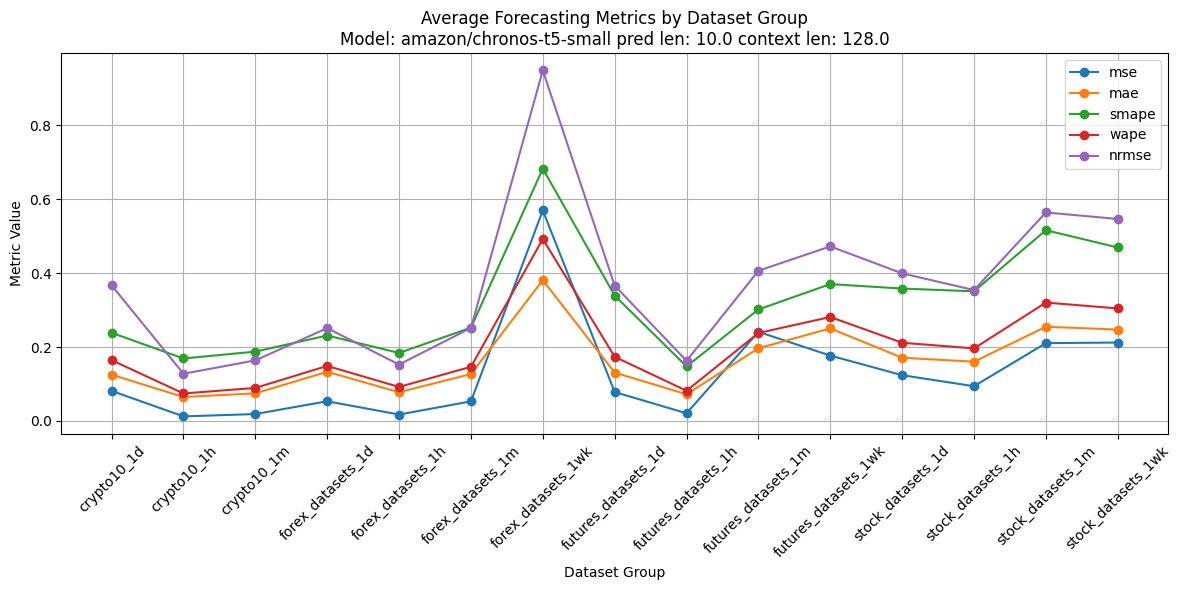


🔢 Total number of results.json files found: 908


In [16]:

#config
# Define the root result directory
root_dir = Path(r"chronos\chronos_small_of1\h10")
show_results(root_dir)